# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# TD2 - Régression linéaire

Ce TD concerne la régression linéaire (Chapitre 2 du cours). À la fin de ce TD, vous devriez être avoir été en mesure de :
- Estimer les coefficients des paramètres de la régression linéaire simple avec la méthode des moindres carrés.
- Estimer les coefficients des paramètres de la régression linéaire multiple avec la méthode des moindres carrés.
- Calculer le coefficient de détermination.
- Sélectionner le meilleur modèle unidimensionnel.
- Calculer avec des méthodes numériquement stables les coefficients de régression.

# Contexte : Pourcentage de matière grasse

Le pourcentage de matière grasse d'un patient est une mesure largement utilisée en médecine pour estimer les facteurs de risque de plusieurs maladies. Cette quantité est cependant très difficile à mesurer. La mesure implique en effet d’immerger le patient dans un cylindre gradué rempli d’eau afin de calculer sa masse volumique. Cette procédure est non seulement inconfortable pour le patient mais pratiquement impossible à effectuer dans le bureau du médecin.

Par conséquent, on souhaite savoir si on peut prédire le pourcentage de gras Y avec trois mesures beaucoup plus simples à obtenir :

- $x_1$ : l'épaisseur des plis de la peau des triceps (en mm) ;<br/>
- $x_2$ : le tour de cuisse (en mm) ;<br/>
- $x_3$ : la circonférence du bras en (mm).<br/>

Les mesures du fichier *bodyfat.csv* proviennent de 20 femmes en bonne santé, âgées entre 20 et 34 ans. Ceci est un jeu de données réel.


In [1]:
# Chargement des librairies
using CSV, DataFrames, Distributions, Gadfly, Statistics, LinearAlgebra

# Exercice 1 - Régression linéaire simple

Nous étudierons dans cet exercice la meilleure variable explicative pour le pourcentage de matière grasse.

In [2]:
# Chargement des données
data = CSV.read("bodyfat.csv", DataFrame)
first(data,5)

,Triceps,Thigh,Midarm,Bodyfat
,Float64,Float64,Float64,Float64
1,19.5,43.1,29.1,11.9
2,24.7,49.8,28.2,22.8
3,30.7,51.9,37.0,18.7
4,29.8,54.3,31.1,20.1
5,19.1,42.2,30.9,12.9


## a) Affichage du pourcentage de graisse en fonction des variables explicatives

Tracer les nuages de points du pourcentage de graisse en fonction des variables explicatives. 

- Est-ce qu'une relation linéaire semble appropriée pour chacune de ces trois variables ? 
- Quelle variable vous semble la meilleure et pour quelle raison ?

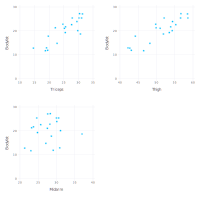

In [3]:
set_default_plot_size(20cm,20cm)
tab1=plot(data,y=:Bodyfat,x=:Triceps,Geom.point)
tab2=plot(data,y=:Bodyfat,x=:Thigh,Geom.point)
tab3=plot(data,y=:Bodyfat,x=:Midarm,Geom.point)
gridstack([tab1 tab2 ;tab3 plot()]) # matrix first row tab1 and tab2, second row tab3 and empty

## b) Estimation des paramètres de la régression linéaire simple avec $x₁$

Estimez lez paramètres du modèle de régression linéaire pour chacun des trois variables explicatives.

In [4]:
x=data[!,:Triceps]
y=data[!,:Bodyfat]

nx=length(x)
ny=length(y)

xmean=mean(x)
ymean=mean(y)

tab1=[]
tab2=[]

for i=1:nx
    push!(tab1,(x[i]-xmean)*(y[i]-ymean))
end

num=sum(tab1)

den=[]
for i=1:nx
    push!(den,(x[i]-xmean)^2)
end

dentot=sum(den)

b1=num/dentot #beta hat 1

b0=ymean-b1*xmean #beta hat 2
print(b0)
        

-1.4961046410368972

In [5]:
# Vous devriez obtenir β̂₀ = -1.50 et β̂₁ = 0.857.

## c) Affichage de la droite de régression obtenue

Superposez au nuage de points précédent la droite de régression estimée. Vous pouvez utiliser la géométrie `Geom.abline()` de *Gadfly*. 

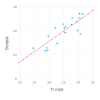

In [6]:
set_default_plot_size(10cm,10cm)
plot(data,x=:Triceps,y=:Bodyfat,Geom.point,intercept=[b0],slope=[b1], Geom.abline(color="red",style=:dash))
# by putting :varname the plot will have the names instead of x and y. always use [] for intercept (ordonne origine) and slope
# Geom.abline give color to slope and line style

## d) Calcul du coefficient de détermination

Calculez le coefficient de détermination de la régression.

In [7]:
# calculer R2=SSR/SST

slopey=b0 .+ b1*x  # .+ when adding vector variable

# calculer SSR=sum from 1 to n (slopey-ymean)^2
SSR=sum((slopey[i]-ymean)^2 for i=1:ny) # gives different values for x to compute y

# calculer SST=SSR+SSE
# calculer SSE=sum from 1 to n (y-slopey)^2
SSE=sum((y[i]-slopey[i])^2 for i=1:ny)
SST=SSR+SSE

R2=SSR/SST
print("R2=$R2")

R2=0.7110966155559691

In [8]:
# Vous devriez obtenir R² = 0.7110966155559691

## e) Interprétation du modèle de régression

Donnez une interprétation de 
- de l'estimation de l'ordonnée à l'origine $β̂₀$ ;
- de l'estimation de la pente $β̂₁$ ;
- du coefficient de détermination $R²$ .

In [9]:
# R2 &=70% de la variabilite total est explique par le modele
# le pourcentage de gras augmente en moyenne de 85% par mm de epaisseur du triceps

## f)  Identification du meilleur modèle unidimensionnel

Identifiez lequel parmi les trois modèles de régression linéaire simple est le meilleur pour prédire le pourcentage de matière grasse d'un patient ? Justifier quantitativement votre réponse. 

Indice : calculez le coefficient de détermination de chacun des modèles et sélectionnez celui ayant le plus grand.

In [10]:
# x2=Thigh et y=Bodyfat
x2=data[!,:Thigh]
x2mean=mean(x2)

# pour chaque model calculer R2=SSR/SST
# b0 et b1 pour Thigh
b1x2=(sum((x2[i]-x2mean)*(y[i]-ymean) for i=1:ny))/(sum((x2[i]-x2mean)^2 for i=1:nx))
b0x2=ymean-b1x2*x2mean
# β̂₀=-23.634489130309518  β̂₁=0.85654659234531

slopeyx2=b0x2 .+ b1x2*x2

# SSR Thigh=sum from 1 to n (slopey-ymean)^2
SSRx2=sum((slopeyx2[i]-ymean)^2 for i=1:ny)
println("SSR Thigh=$SSRx2")

# SST Thigh=SSR+SSE
# SSE Thigh=sum from 1 to n (y-slopey)^2
SSEx2=sum((y[i]-slopeyx2[i])^2 for i=1:ny)
println("SSE Thigh=$SSEx2")

SSTx2=SSRx2+SSEx2
println("SST Thigh=$SSTx2")

println("")

R2x2=SSRx2/SSTx2   # R2=0.7710414083275695
println("R2 Thigh=$R2x2")
 

#############################
# x3=Midarm et y=Bodyfat
x3=data[!,:Midarm]
x3mean=mean(x3)

# b0 et b1 pour Midarm
b1x3=(sum((x3[i]-x3mean)*(y[i]-ymean) for i=1:ny))/(sum((x3[i]-x3mean)^2 for i=1:nx))
b0x3=ymean-b1x3*x3mean
# β̂₀=14.686780858775304  β̂₁=0.1994286437807638

slopeyx3=b0x3 .+ b1x3*x3

# SSR Midarm=sum from 1 to n (slopey-ymean)^2
SSRx3=sum((slopeyx3[i]-ymean)^2 for i=1:ny)

# SST Midarm=SSR+SSE
# SSE Midarm=sum from 1 to n (y-slopey)^2
SSEx3=sum((y[i]-slopeyx3[i])^2 for i=1:ny)
SSTx3=SSRx3+SSEx3
println("SSE Midarm=$SSEx3")
println("SST Midarm=$SSTx3")

R2x3=SSRx3/SSTx3   # R2=0.02029030188132378
println("R2 Midarm=$R2x3")


SSR Thigh=381.96581775069035
SSE Thigh=113.42368224930948
SST Thigh=495.3894999999998

R2 Thigh=0.7710414083275695
SSE Midarm=485.33789749616193
SST Midarm=495.3895
R2 Midarm=0.02029030188132378


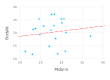

In [11]:
# le meilleur modele est celui avec Thigh comme variable explicative
set_default_plot_size(11cm,8cm)
plot(data,x=:Midarm,y=:Bodyfat,Geom.point, Coord.cartesian(ymin=10, ymax=30),
    intercept=[b0x3],slope=[b1x3],Geom.abline(color="red",style=:dash))

# Exercice 2 - Régression linéaire multiple

Dans cet exercice, les trois variables explicatives seront utilisées pour prédire le pourcentage de matière grasse d'un patient.

## a) Estimation des paramètres de la régression linéaire multiple

En utilisant les trois variables explicatives, estimez les paramètres de la régression linéaire multiple avec la méthode des moindres carrés.

In [12]:
X=[ones(nx) x x2 x3] # put var storing column data as matrix column
                     # ones(n) puts a column of 1 n times
B=*(*(inv(*(X',X)),X'),y) # X'=transpose(X) inv(A)=inverse(A) *(X',X)=matrix multiplication 
println("la matrice B=$B")


la matrice B=[117.08469478016318, 4.334092008375593, -2.856847936297793, -2.1860602516929113]


In [13]:
# Vous devriez obtenir β̂ = [117.0846947802495, 4.334092008375274, -2.856847936298782, -2.186060251693594]

## b) Calcul du coefficient de détermination 


Calculez le coefficient de détermination et comparez-le à ceux de la question 1 (f). Pouvez-vous conclure que ce modèle est meilleur ?

In [14]:
# coefficient de determination
# Y = XB + e => e=Y-XB
e=y-X*B

# SSE=transpose(e)*e
SSE=e'e

# SST=sum from 1 to n (y-ymean)^2  (la deuxieme formule)
SST = sum( (y[i] - ymean)^2 for i=1:ny )  

# SST=SSR+SSE => SSR=SST-SSE
SSR=SST-SSE

R2=SSR/SST # R2=0.8013585508623703
println("R2 regression multiple=$R2")





R2 regression multiple=0.8013585508623703


In [15]:
# Vous devriez obtenir R² = 0.8013585508623703

## c) Calcul d'une prédiction

Si une patiente possède les caractérisques suivantes :

 - $x_1$ = 25.0
 - $x_2$ = 51.0
 - $x_3$ = 27.5
 
 Quelle est la meilleure prédiction pour son pourcentagede pourcentage de graisse ?

In [16]:
yestimate=[1 25.0 51.0 27.5]*B
println("avec x1=25.0 x2=51.0 et x3=27.5 le pourcentage de gras est de $yestimate")

avec x1=25.0 x2=51.0 et x3=27.5 le pourcentage de gras est de [19.621093316810487]


In [17]:
# Vous devriez obtenir 19.6

## d) Calcul des coefficients de régression à l'aide de la décomposition QR

Pour rendre les calculs numériques stables et efficaces, les coefficients de régressions sont généralement calculés à l'aide de la décomposition QR de la matrice de structure X, *i.e.*
$$ X = QR.$$

On peut montrer (Exercice 1 de la fin du chapitre 2 des notes de cours) que 

$$ β̂ = R^{-1} Q^\top y.$$

L'opération de la décomposition QR et de la résolution du système linéaire s'effectue en une commande à l'aide de l'opérateur `\`.

Estimez les coefficients de régression avec la commande `β̂ = X \ y`. Obtenez-vous les mêmes résultats ?


In [23]:
Q,R=qr(X) # factorisation QR de la matrice X X=QR

Beta=X\y # decomposition QR et resolution du systeme
println(Beta)



[117.08469477513394, 4.334092008220818, -2.856847936166419, -2.186060251612094]


Pour de grands jeux de données, cette solution est beaucoup plus performante et précise. Pour de petits jeux de données tel que celui-ci, ce n'est pas plus rapide de passer par la décomposition QR mais ça demeure plus précis numériquement.